# Khai báo thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Loading dữ liệu lên jupyter

In [2]:
data = pd.read_excel('SCMission-2023_Round-3-Data-Đã clean.xlsm')

## Lưu dữ liệu ở sheet Customer_Master vào dataframe

In [3]:
CustomerMaster = pd.read_excel('SCMission-2023_Round-3-Data-Đã clean.xlsm', sheet_name = 'Customer_Master')

C:\Users\PC\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


## Tạo ndarray 2D sử dụng numpy từ 2 cột Longitude và Latitude

In [4]:
Longitude = CustomerMaster['Longitude'].values
Latitude = CustomerMaster['Latitude'].values

data = np.column_stack((Longitude, Latitude))
data.shape

(314, 2)

## Dùng phương pháp Elbow tìm số cụm phù hợp

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

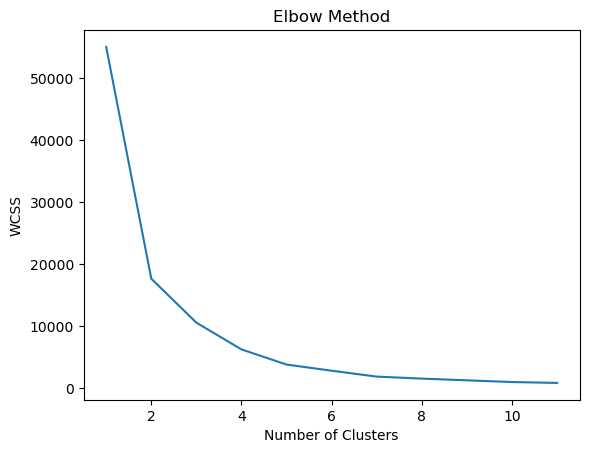

In [5]:
wcss = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 12), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

#  ==> Chọn 7 cụm 
Thực hiện Kmean trên dữ liệu longitude và latitude của khách hàng

In [6]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(data)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7)

In [7]:
kmeans = KMeans(init="k-means++",n_clusters=7, n_init=3)
kmeans.fit(data)

KMeans(n_clusters=7, n_init=3)

# Vẽ biểu đồ

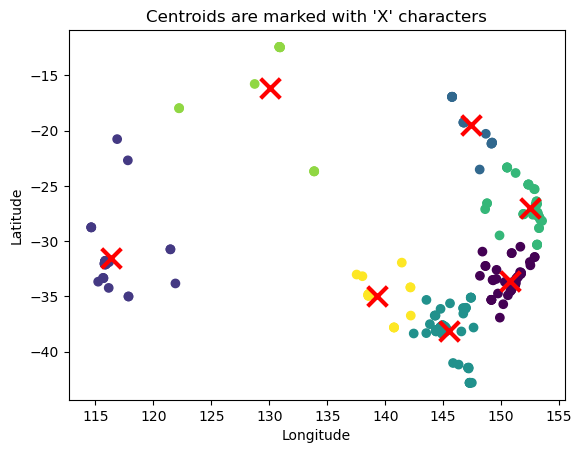

In [8]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(data[:,0], data[:,1], c =labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s= 200, linewidths = 3, color = 'r')
plt.title( "Centroids are marked with 'X' characters")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()